In [28]:
#installing libraries 
!pip install openpyxl
!pip install fancyimpute
!pip install missingno
!pip install xgboost
!pip install scikit-optimize

In [29]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from fancyimpute import IterativeImputer
from skopt import BayesSearchCV

import warnings
warnings.filterwarnings('ignore')

In [30]:
#read file and display data dictionary
description = pd.read_excel('C:/Users/rajpu/Downloads/ECommerceDataset.xlsx', sheet_name='Data Dict', header=1, usecols=[1,2,3])
data = pd.read_excel('C:/Users/rajpu/Downloads/ECommerceDataset.xlsx', sheet_name='E Comm')
description

,Data,Variable,Discerption
0,E Comm,CustomerID,Unique customer ID
1,E Comm,Churn,Churn Flag
2,E Comm,Tenure,Tenure of customer in organization
3,E Comm,PreferredLoginDevice,Preferred login device of customer
4,E Comm,CityTier,City tier
5,E Comm,WarehouseToHome,Distance in between warehouse to home of customer
6,E Comm,PreferredPaymentMode,Preferred payment method of customer
7,E Comm,Gender,Gender of customer
8,E Comm,HourSpendOnApp,Number of hours spend on mobile application or...
9,E Comm,NumberOfDeviceRegistered,Total number of deceives is registered on part...


In [31]:
#preview the data file
data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [32]:
#check the shape of the dataset
print(data.shape)

(5630, 20)


In [33]:
#printing summary statistics
data.describe(include='all')

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630,5630.000000,5379.000000,5630,5630,5375.000000,5630.000000,5630,5630.000000,5630,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
unique,NaN,NaN,NaN,3,NaN,NaN,7,2,NaN,NaN,6,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Mobile Phone,NaN,NaN,Debit Card,Male,NaN,NaN,Laptop & Accessory,NaN,Married,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,2765,NaN,NaN,2314,3384,NaN,NaN,2050,NaN,2986,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,52815.500000,0.168384,10.189899,NaN,1.654707,15.639896,NaN,NaN,2.931535,3.688988,NaN,3.066785,NaN,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,NaN,0.915389,8.531475,NaN,NaN,0.721926,1.023999,NaN,1.380194,NaN,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,NaN,1.000000,5.000000,NaN,NaN,0.000000,1.000000,NaN,1.000000,NaN,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,NaN,1.000000,9.000000,NaN,NaN,2.000000,3.000000,NaN,2.000000,NaN,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,NaN,1.000000,14.000000,NaN,NaN,3.000000,4.000000,NaN,3.000000,NaN,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,NaN,3.000000,20.000000,NaN,NaN,3.000000,4.000000,NaN,4.000000,NaN,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500


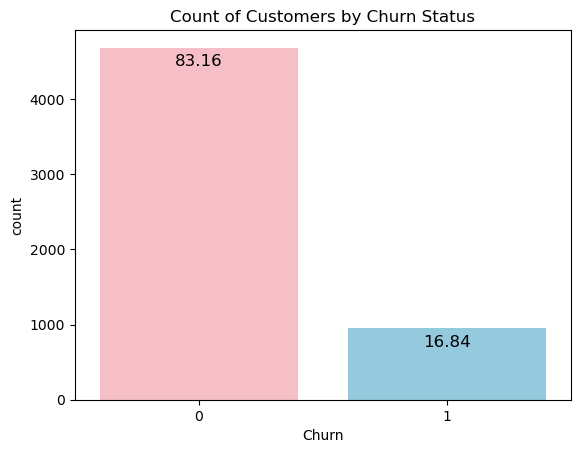

In [34]:
ax = sns.countplot(x='Churn', data=data, palette=['lightpink', 'skyblue']) 
for a in ax.patches:
    ax.annotate(format((a.get_height()/5630)*100, '.2f'), 
                (a.get_x() + a.get_width()/2., a.get_height()), 
                ha='center', va='center', size=12, xytext=(0, -10), textcoords='offset points')
plt.title("Count of Customers by Churn Status")
plt.show()


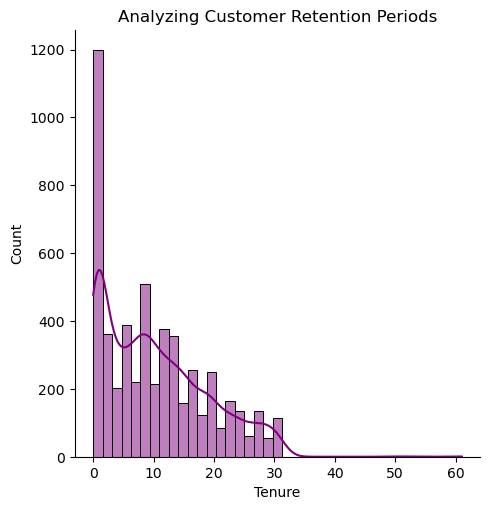

In [35]:
#Distribution of the Tenure of the customers on the platform
sns.displot(x='Tenure', kde=True, data=data, color='purple')
plt.title("Analyzing Customer Retention Periods")
plt.show()

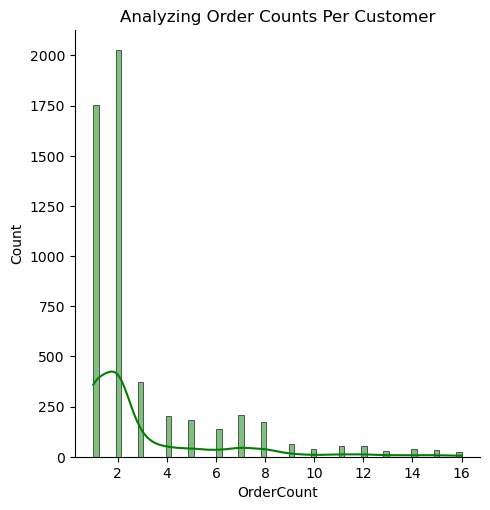

In [36]:
#Distribution of Order Count of customers
sns.displot(x='OrderCount', kde=True, data=data, color='green')
plt.title("Analyzing Order Counts Per Customer")
plt.show()

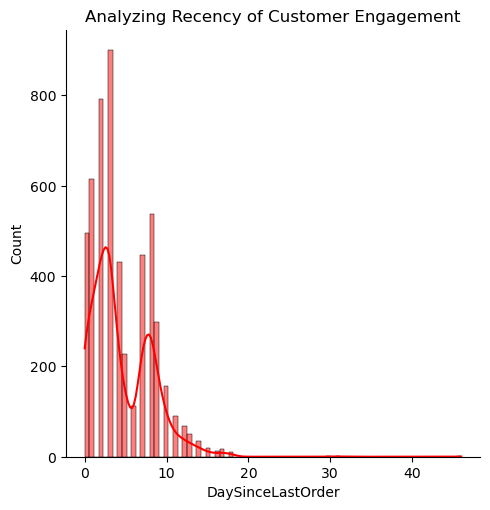

In [37]:
#Distribution of Recency of the customers
sns.displot(x='DaySinceLastOrder', kde=True, data=data, color='red')
plt.title("Analyzing Recency of Customer Engagement")
plt.show()

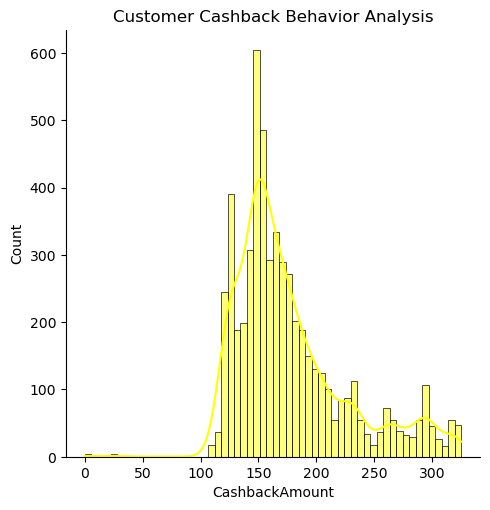

In [38]:
#Distribution of Amount returned for money spent by customers
sns.displot(x='CashbackAmount',kde=True, data=data, color='yellow')
plt.title('Customer Cashback Behavior Analysis')
plt.show()

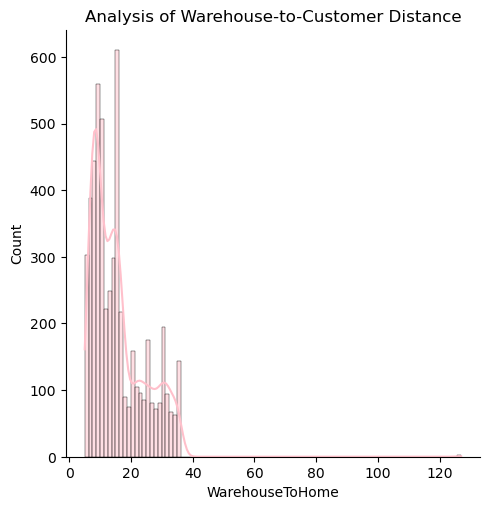

In [39]:
#Distribution of distance of Warehouse to customers home
sns.displot(x='WarehouseToHome', kde=True, data=data, color='pink')
plt.title("Analysis of Warehouse-to-Customer Distance")
plt.show()

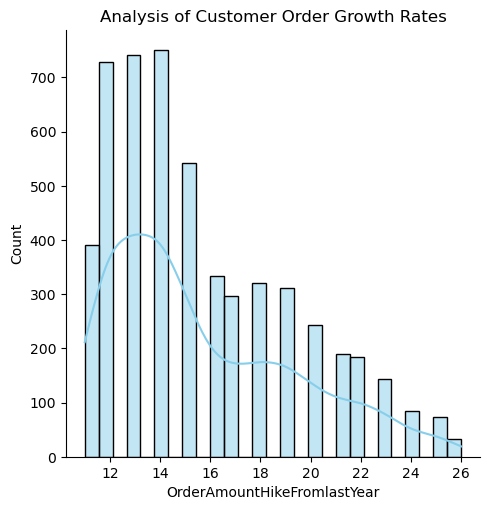

In [40]:
#Distribution of Percentage increase in customer orders
sns.displot(x='OrderAmountHikeFromlastYear', kde=True, data=data, color='skyblue')
plt.title("Analysis of Customer Order Growth Rates")
plt.show()

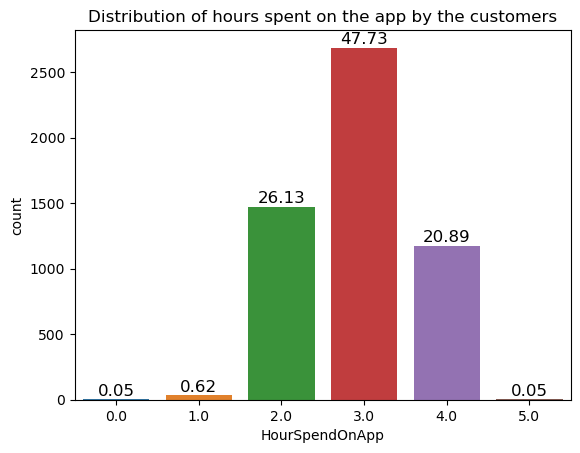

In [41]:
#Distribution of Hours spent on the app by the customers
axx = sns.countplot(x='HourSpendOnApp', data=data)
for a in axx.patches:
    axx.annotate(format((a.get_height()/5630)*100,'.2f'), (a.get_x() + a.get_width()/2., a.get_height()),\
                ha='center',va='center',size=12,xytext=(0, 6),textcoords='offset points')
plt.title("Distribution of hours spent on the app by the customers")
plt.show()

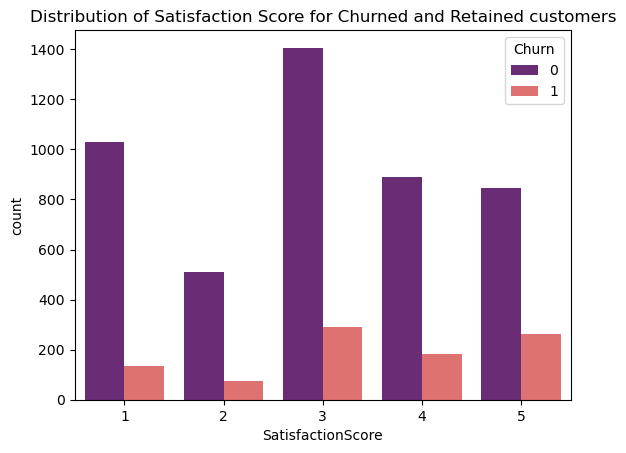

In [42]:
#Distribution Satisfaction score for churned and retained customers
sns.countplot(x='SatisfactionScore', hue='Churn', palette='magma', data=data)
plt.title("Distribution of Satisfaction Score for Churned and Retained customers")
plt.show()

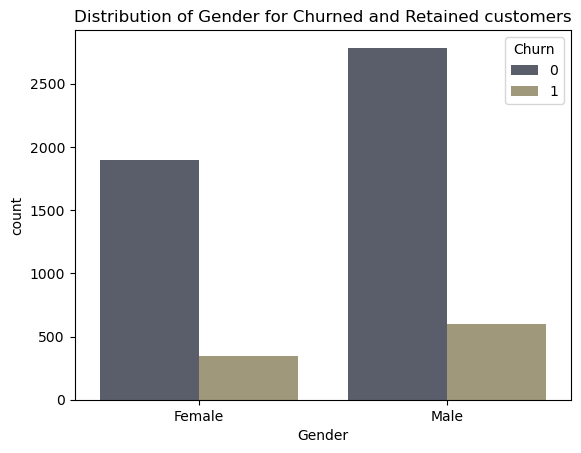

In [43]:
#Distribution of Gender for churned and retained customers
sns.countplot(x='Gender', hue='Churn', palette='cividis', data=data)
plt.title("Distribution of Gender for Churned and Retained customers")
plt.show()

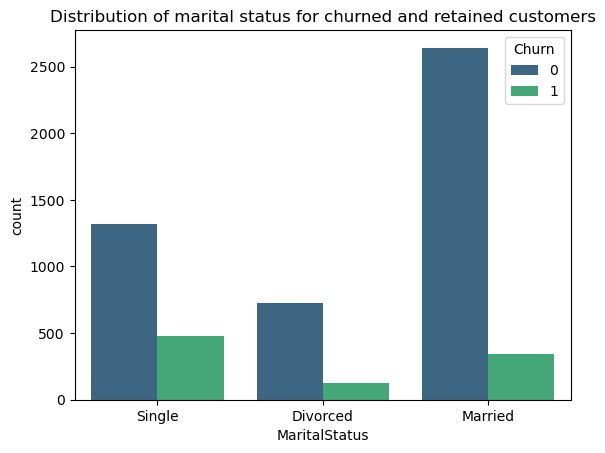

In [44]:
#Distribution of marital status for churned and retained customers
sns.countplot(x='MaritalStatus', hue='Churn', palette='viridis', data=data)
plt.title("Distribution of marital status for churned and retained customers")
plt.show()

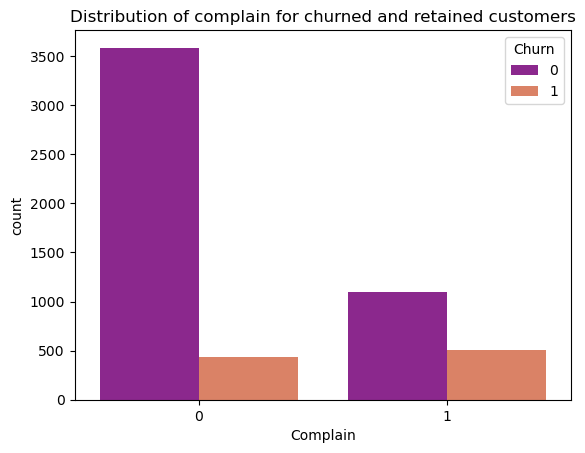

In [45]:
#Distribution of complain for churned and retained customers
sns.countplot(x='Complain', hue='Churn', palette='plasma', data=data)
plt.title("Distribution of complain for churned and retained customers")
plt.show()

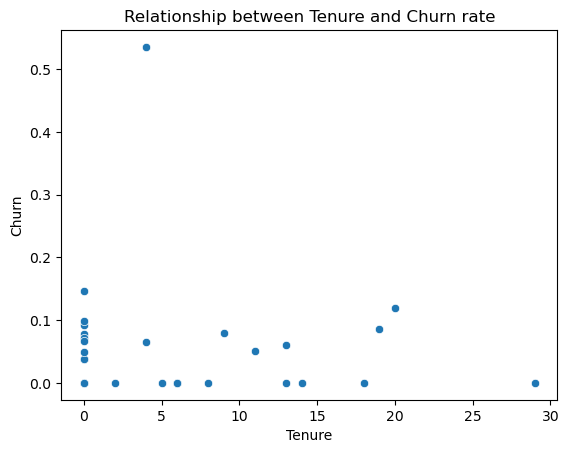

In [46]:
#Relationship between the Tenure and Churn rate
sns.scatterplot(x=data['Tenure'],y=data.groupby('Tenure').Churn.mean())
plt.title("Relationship between Tenure and Churn rate")
plt.show()

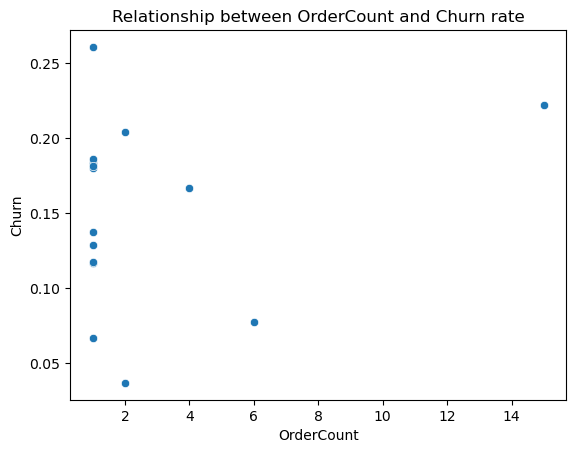

In [48]:
sns.scatterplot(x=data['OrderCount'],y=data.groupby('OrderCount').Churn.mean())
plt.title("Relationship between OrderCount and Churn rate")
plt.show()

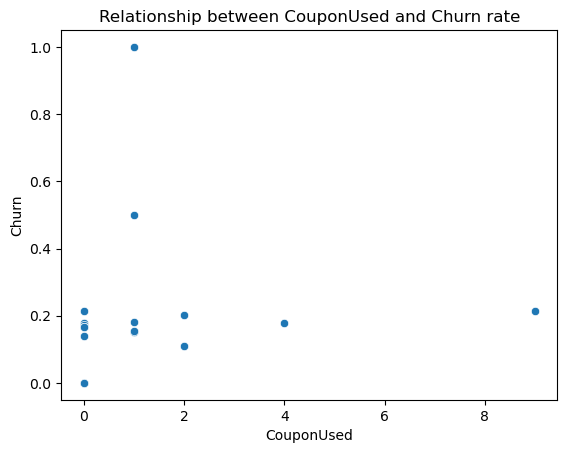

In [49]:
sns.scatterplot(x=data['CouponUsed'],y=data.groupby('CouponUsed').Churn.mean())
plt.title("Relationship between CouponUsed and Churn rate")
plt.show()

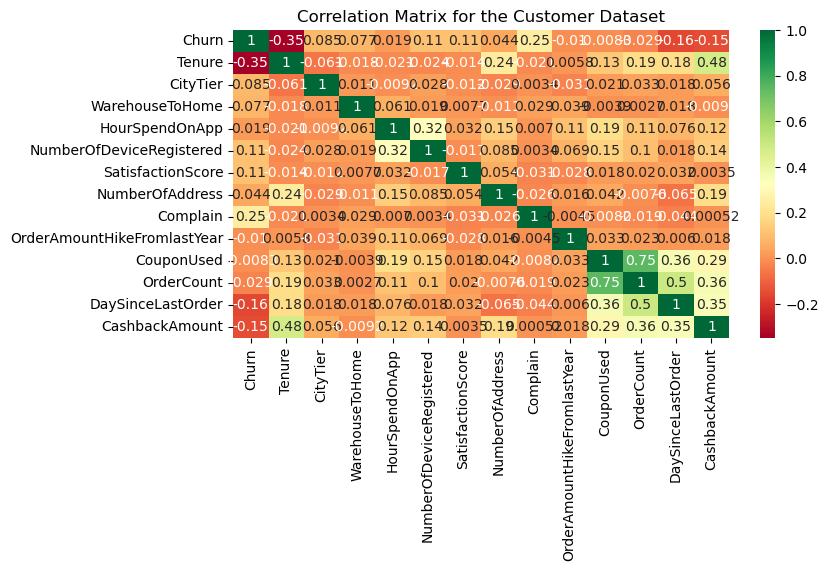

In [54]:
numeric_data = data.drop('CustomerID', axis=1).select_dtypes(include=['number'])

#Correlationmatrix
plt.figure(figsize=(8, 4))
sns.heatmap(numeric_data.corr(), annot=True, cmap='RdYlGn')
plt.title("Correlation Matrix for the Customer Dataset")
plt.show()


In [55]:
#DATA PREPROCESSING

#count the number of missing values in each column
data.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [57]:
#count the total number of missing values
print(f'Number of missing values in the dataset: {data.isnull().sum().sum()}')
#count the number of rows with missing values
print(f'Number of rows with missing values: {data[data.isnull().any(axis=1)].shape[0]}')

Number of missing values in the dataset: 1856
Number of rows with missing values: 1856


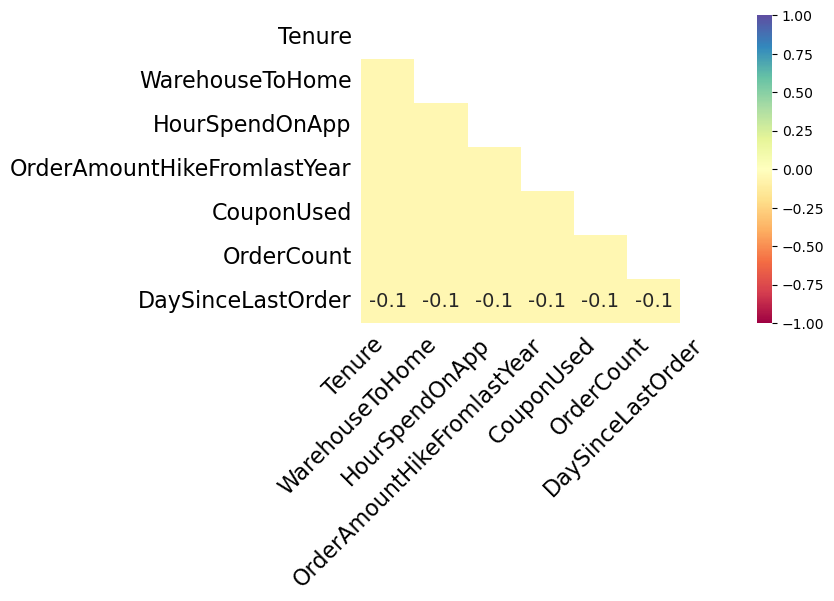

In [63]:
#plot heatmap of missing values
msno.heatmap(data,figsize=(6,4), cmap='Spectral')
plt.show()

In [64]:
#Categorical encoding for machine learning models
cat_data = data.select_dtypes(include='object')
cat_data

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,Mobile Phone,Debit Card,Female,Laptop & Accessory,Single
1,Phone,UPI,Male,Mobile,Single
2,Phone,Debit Card,Male,Mobile,Single
3,Phone,Debit Card,Male,Laptop & Accessory,Single
4,Phone,CC,Male,Mobile,Single
...,...,...,...,...,...
5625,Computer,Credit Card,Male,Laptop & Accessory,Married
5626,Mobile Phone,Credit Card,Male,Fashion,Married
5627,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
5628,Computer,Credit Card,Male,Laptop & Accessory,Married


In [65]:
#encode categorical variables and add it to the normal dataset
encoded = pd.get_dummies(cat_data,drop_first=True)

data_enc = pd.concat([data.drop(cat_data.columns, axis=1), encoded], axis=1)
data_enc.drop('CustomerID', axis=1,inplace=True)

In [66]:
#selecting features and target variable, and splitting the data
X=data_enc.drop(['Churn'],axis=1)
y=data_enc['Churn']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

#cross validation
skfcv=StratifiedKFold(n_splits=5)

In [67]:
#LOGISTICS REGRESSION
log_pipe = Pipeline([('imputer',IterativeImputer(random_state=0)),('scaler',StandardScaler()),
                    ('logreg',LogisticRegression())])

#cross validate logistic regression model
print(f"Cross validation score for Logistic Regression: {np.mean(cross_val_score(log_pipe, X_train, y_train, cv=skfcv, scoring='f1'))}")

Cross validation score for Logistic Regression: 0.6316720359392626


Test score for Logistic Regression: 0.6409495548961425
Training score for Logistic Regression: 0.6497305619707466


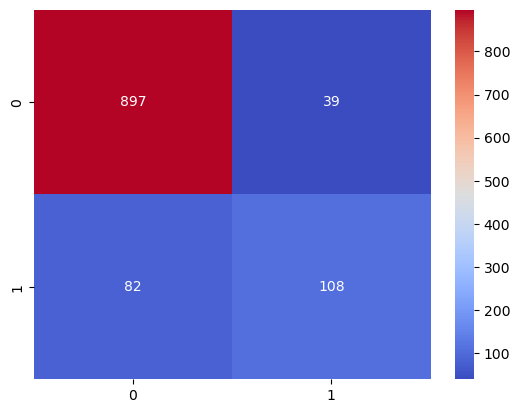

In [70]:
#use logistic regression pipeline to predict test sample
log_pipe.fit(X_train,y_train)
print(f"Test score for Logistic Regression: {f1_score(y_test, log_pipe.predict(X_test))}")
print(f"Training score for Logistic Regression: {f1_score(y_train, log_pipe.predict(X_train))}")
log_mat = confusion_matrix(y_test, log_pipe.predict(X_test))
sns.heatmap(log_mat, annot=True,fmt="g", cmap='coolwarm')
plt.show()

In [71]:
#RANDOM FOREST
rf_pipe = Pipeline([('imputer',IterativeImputer(random_state=0)),('scaler',StandardScaler()),
                    ('rfmodel',RandomForestClassifier())])

#cross validate Random Forest model
print(f"Cross validation score for Random Forest: {np.mean(cross_val_score(rf_pipe, X_train, y_train, cv=skfcv, scoring='f1'))}")

Cross validation score for Random Forest: 0.8586052626002163


Test score for Random Forest: 0.9005524861878453
Training score for Random Forest: 1.0


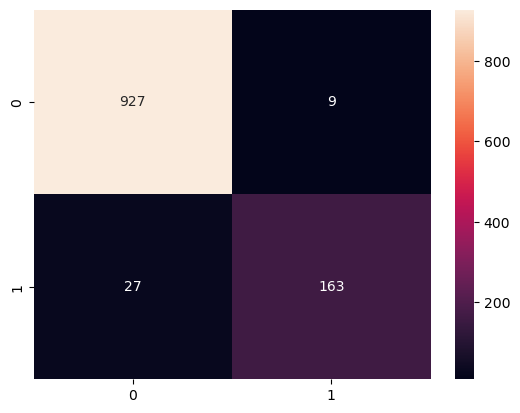

In [72]:
#use Random Forest pipeline to predict test and train sample
rf_pipe.fit(X_train,y_train)
print(f"Test score for Random Forest: {f1_score(y_test, rf_pipe.predict(X_test))}")
print(f"Training score for Random Forest: {f1_score(y_train, rf_pipe.predict(X_train))}")
rf_mat = confusion_matrix(y_test, rf_pipe.predict(X_test))
sns.heatmap(rf_mat, annot=True,fmt="g")
plt.show()

In [73]:
#XGBOOST
xgb_pipe = Pipeline([('imputer',IterativeImputer(random_state=0)),('scaler',StandardScaler()),
                    ('xgb',XGBClassifier(verbosity=0,use_label_encoder=False))])

#cross validate XGBoost model
print(f"Cross validation score for XGBoost: {np.mean(cross_val_score(xgb_pipe, X_train, y_train, cv=skfcv, scoring='f1'))}")

Cross validation score for XGBoost: 0.8911146143929061


Test score for XGBoost: 0.9157894736842105
Training score for XGBoost: 1.0


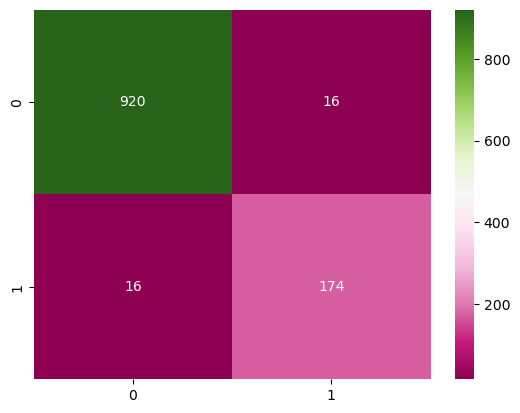

In [74]:
#use XGBoost pipeline to predict test and train sample
xgb_pipe.fit(X_train,y_train)
print(f"Test score for XGBoost: {f1_score(y_test, xgb_pipe.predict(X_test))}")
print(f"Training score for XGBoost: {f1_score(y_train, xgb_pipe.predict(X_train))}")
xgb_mat = confusion_matrix(y_test, xgb_pipe.predict(X_test))
sns.heatmap(xgb_mat, annot=True, fmt="g", cmap='PiYG')
plt.show()

In [75]:
#HYPERPARAMETER TUNING
#create hyperparameter search space
space={'xgb__eta': (0.01,0.3),
       'xgb__max_depth': (5,11),
      'xgb__subsample': (0.4,1),
      'xgb__n_estimators': (100,250),
      'xgb__gamma':(0,5),
      'xgb__colsample_bytree':(0.4,1),
      'xgb__min_child_weight': (0.3,1)}

In [76]:
#create BayesSearchCV object
search=BayesSearchCV(xgb_pipe,search_spaces=space,n_jobs=-1,cv=skfcv, scoring='f1')

In [77]:
#fit the object to the data
search.fit(X_train, y_train)

BayesSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
              estimator=Pipeline(steps=[('imputer',
                                         IterativeImputer(random_state=0)),
                                        ('scaler', StandardScaler()),
                                        ('xgb',
                                         XGBClassifier(base_score=None,
                                                       booster=None,
                                                       callbacks=None,
                                                       colsample_bylevel=None,
                                                       colsample_bynode=None,
                                                       colsample_bytree=None,
                                                       device=None,
                                                       early_stopping_rounds=None,
                                                       ena...
                                                       missing=nan,
                                                       monotone_constraints=None,
                                                       multi_strategy=None,
                                                       n_estimators=None,
                                                       n_jobs=None,
                                                       num_parallel_tree=None,
                                                       random_state=None, ...))]),
              n_jobs=-1, scoring='f1',
              search_spaces={'xgb__colsample_bytree': (0.4, 1),
                             'xgb__eta': (0.01, 0.3), 'xgb__gamma': (0, 5),
                             'xgb__max_depth': (5, 11),
                             'xgb__min_child_weight': (0.3, 1),
                             'xgb__n_estimators': (100, 250),
                             'xgb__subsample': (0.4, 1)})

In [78]:
#print the best cv score and the best parameters
print(search.best_score_)
print(search.best_params_)

0.8998285160854067
OrderedDict([('xgb__colsample_bytree', 1.0), ('xgb__eta', 0.27554927349382297), ('xgb__gamma', 0), ('xgb__max_depth', 10), ('xgb__min_child_weight', 0.3), ('xgb__n_estimators', 250), ('xgb__subsample', 1.0)])


0.9424083769633508


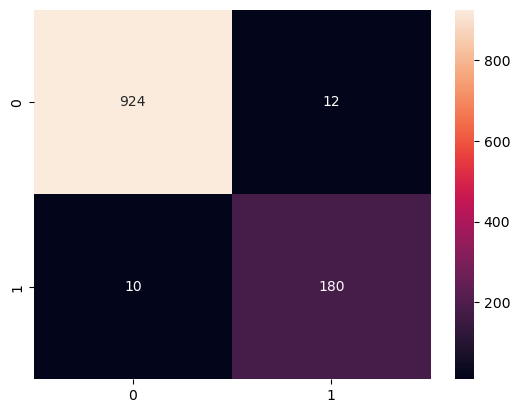

In [79]:
#use the best model parameters to predict the test sample and print the results
best_model=search.best_estimator_
print(f1_score(y_test,best_model.predict(X_test)))
sns.heatmap(confusion_matrix(y_test, best_model.predict(X_test)), annot=True, fmt="g")
plt.show()

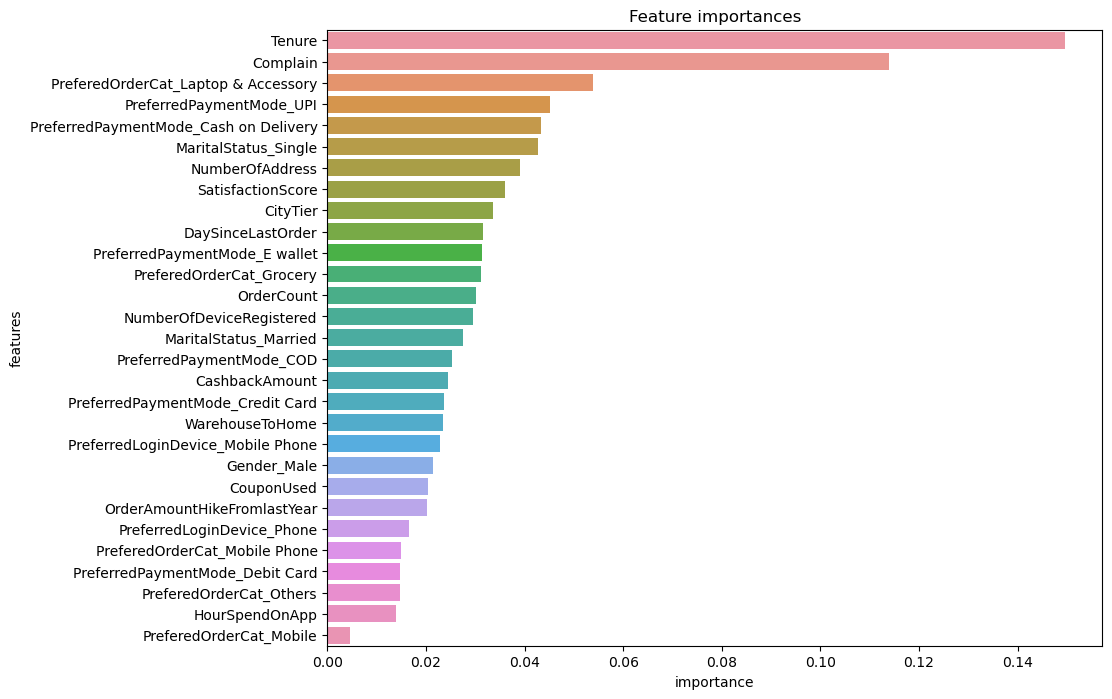

In [80]:
feature_importance=pd.DataFrame(search.best_estimator_[2].feature_importances_, columns=['importance'])
feature_importance['features'] = X_train.columns

plt.figure(figsize=(10,8))
sns.barplot(x='importance', y='features', data=feature_importance.sort_values(by='importance', ascending=False))
plt.title('Feature importances')
plt.show()